# Infinite Potential (Square) Well (1D)

K. Makulowich September 7, 2020 University of Toronto For technical issues: k.makulowich@mail.utoronto.ca

The infinite square well is defined as having zero potential in the well, with infinite potential barriers on either side.

$ V(x) = 0 $:   for 0 < x < L

$ V(x) = \infty$:    for x < 0 and x > L

where L is the width of the square well.

You can control the width of the well using the slider below the graph, either scroll down or collapse the code block after executing.

<IPython.core.display.Javascript object>


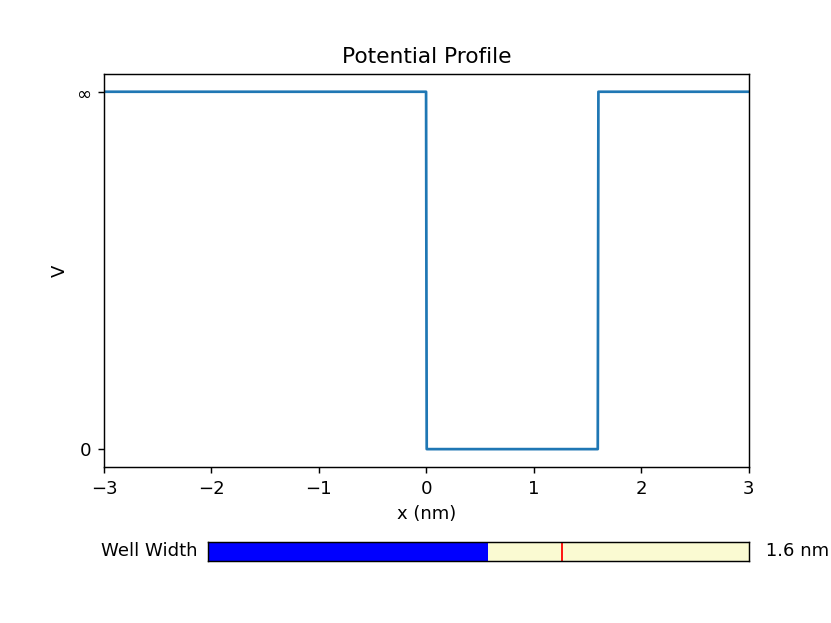

In [1]:
# $$$$$$$$$Collapse$$$$$$$$$$$$$$$$$
# Collapse
# $$$$$$$$$$$$$$$$$$$$$$$$$$

%matplotlib notebook
import MSE430Funcs.ISWfuncs as isw
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
plt.subplots_adjust(bottom=0.25)

#Set initial width of the well
L0 = 2 #nm
#increments to change cell width by
dL = 0.1 #nm

#Set width of potential profile
Ltot = 3 #nm

xs = np.linspace(-Ltot, Ltot, 1000)

Vs = isw.potentialProf(xs,L0)

pp, = ax1.plot(xs, Vs)
ax1.set(title = 'Potential Profile', xlabel='x (nm)', ylabel = 'V', yticks = [0, 1e6], yticklabels=['0', r'$\infty$'])
ax1.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axL = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

sL = Slider(axL, 'Well Width', 0.1, 3, valinit=L0, valstep = dL, valfmt= ' %1.1f nm', facecolor='blue')

def update(val):
    L = sL.val
    pp.set_ydata(isw.potentialProf(xs, L))
    fig1.canvas.draw_idle()


sL.on_changed(update)

plt.show()


The 1D infinite potential is easily solved analytically through the application of boundary conditions. The wavefunction can only exist within the potential well and is zero everywhere else.

$\psi(x<0, x>L) = 0$

Inside the potential well $(0<x<L)$, the  wavefunction must satisfy the time-independent 1D Schrodinger equation.

$\frac{\hbar^2}{2m}\frac{d\psi(x)}{dx^2} = E\psi(x)$

Since within the well, the potential is zero, $V(x) = 0$, the solution is that of a free particle.

$\psi(x) = Ae^{ikx} + Be^{-ikx}, ~~k = \frac{\sqrt{2mE}}{\hbar}$

Now we can apply boundary conditions. Since the wavefunction must be continuous across all barriers, it must go to zero at the well boundaries:

$\psi(0) = \psi(L) = 0$

1st BC:

$\psi(0) = Ae^{ik0} + Be^{-ik0} = 0$

$B = - A$

$\psi(x) = Ae^{ikx} - Ae^{-ikx} = 2iAsin(kx)$

Here, we still use $A$ as coefficient and ignore the phase term $2i$, which won't influence the result.

2nd BC:

$\psi(L) = Asin(kL) = 0 $

$kL = n\pi$, $n = 0,1,2..$

$ k = \frac{n\pi}{L}$

$\psi_n(x) = A_n sin(\frac{n\pi}Lx)$, $~n=1,2,3..$

After normalization, we arrive at the form of our wavefunction and the corresponding energy levels:

$\psi_{nx} = \sqrt{\frac2L}sin(\frac{n\pi x}L)$

$E_n = \frac{h^2n^2}{8mL^2}$ Given $k = \frac{\sqrt{2mE}}{\hbar} = \frac{n\pi}L$

*If you've changed the width of the square well above, remember to refresh the cell below to update the width

<IPython.core.display.Javascript object>


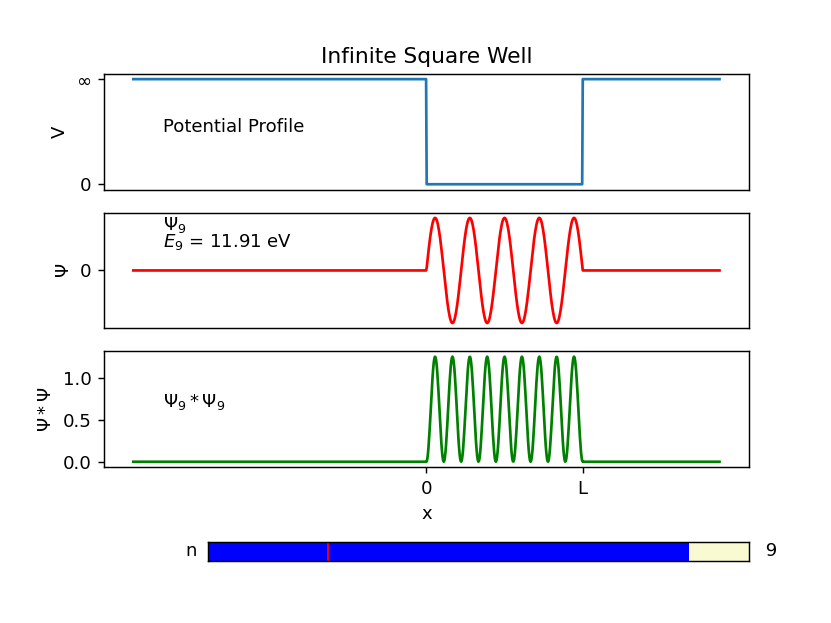

In [3]:
# $$$$$$$$$$$Collapse$$$$$$$$$$$$$
# Collapse
# $$$$$$$$$$$$$$$$$$

#Get well width from chosen value
L = sL.val

#set initial n to 1 (must be >0)
n0=3

#Constants:
#Planck's constant
h = 6.626e-34 # m^2 kg/s
#Mass of electron
m = 9.11e-31 # kg
psi_x = isw.psi_isw(xs, n0,L)

Vs2 = isw.potentialProf(xs,L)

#Calculate energy level
E = h**2 * n0**2 / (8*m*(L*1e-9)**2) #Joules

#Convert energy to eV and truncate
E = round(E / 1.6e-19,2)

#Calculate probability by multiplying Psi by its conjugate
    #Technically unnecessary to conjugate since Psi is real
P_x = np.conj(psi_x) * psi_x


fig2 = plt.figure()
ax2 = fig2.add_subplot(3,1,1)
ax3 = fig2.add_subplot(3,1,2)
ax4 = fig2.add_subplot(3,1,3)
plt.subplots_adjust(bottom=0.25)

isw.graphProp(ax2, ax3, ax4, L, Ltot)

axn = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
sn = Slider(axn, 'n', 1, 10, valinit=n0, valstep=1, valfmt= ' %d', facecolor='blue')

pp2, = ax2.plot(xs, Vs2)

psi_p, = ax3.plot(xs, psi_x, color = 'red')
ymin, ymx= ax3.get_ylim()
psi_t = ax3.text(-Ltot*.9, ymx*.7, r'$\Psi_{}$'.format(n0) )
psi_E = ax3.text(-Ltot*.9, ymx*.4, r'$E_{}$ = {} eV'.format(n0, E))

prob, = ax4.plot(xs, P_x, color = 'green')
ymin, ymx = ax4.get_ylim()
prob_t = ax4.text(-Ltot*.9, ymx/2, r'$\Psi_{}*\Psi_{}$'.format(n0,n0))

def update(val):
    n = sn.val
    psi = isw.psi_isw(xs, n, L)
    psi_p.set_ydata(isw.psi_isw(xs, n, L))
    psi_t.set_text(r'$\Psi_{}$'.format(int(n)))
    
    E = h**2 * n**2 / (8*m*(L*1e-9)**2) #Joules
    E = round(E / 1.6e-19,2)
    psi_E.set_text(r'$E_{}$ = {} eV'.format(int(n), E))
    prob.set_ydata(psi*psi)
    prob_t.set_text(r'$\Psi_{}*\Psi_{}$'.format(int(n),int(n)))
    fig2.canvas.draw_idle()

sn.on_changed(update)

#ax3.hlines([0, L], )
plt.show()
